In [1]:
import numpy as np
import pandas as pd
import GPy
import time
import sys
import os
import pdb
import matplotlib.pyplot as plt

from context import aep
from context import load_data
from context import delete_blocks
from context import start_df
from context import save_df
from context import metrics
from thesis_work.plots import GP_figures
from thesis_work.plots import SGP_figures
from thesis_work.plots import DGP_figures

from baseline_models import full_GP_reg
from baseline_models import sparse_GP_reg
from aep_config import cont_optimization
from aep_config import aep_DGP_reg

default_dict = {'M': 30, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':100,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}
os.getcwd()
%matplotlib notebook

# Load data: normalise, delete blocks

Dataset size:  2500  Test size:  1000.0
Training:  100
Removing blocks... [-3.5, 1, 7, 11]
Removing blocks... [-3.5, 1, 7, 11]


<IPython.core.display.Javascript object>


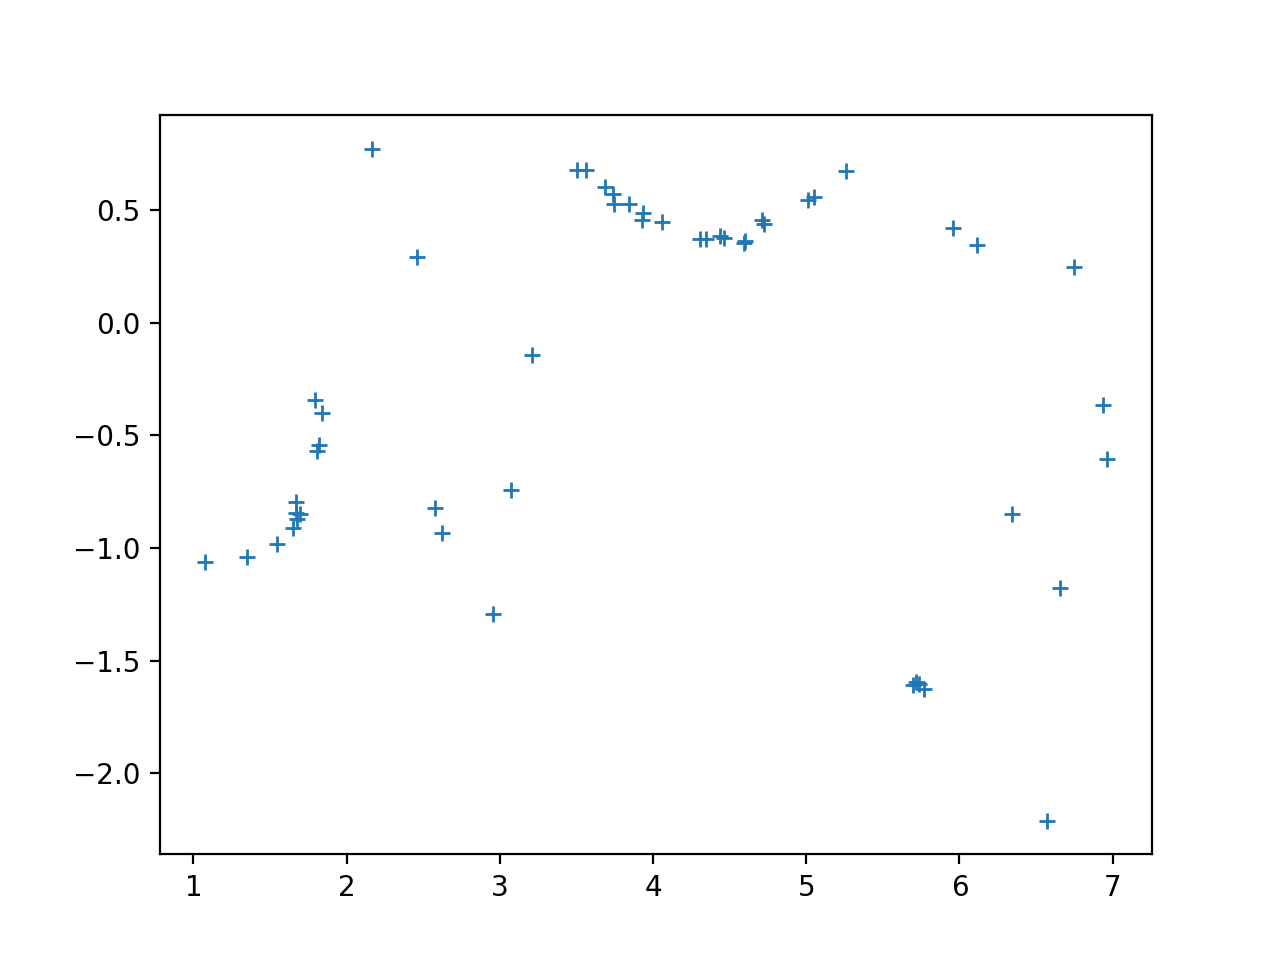

(51, 1)

In [34]:
path = 'data/sample_1.txt'
X_train, y_train, X_test, y_test = load_data(path, N_train=100, test=0.4, norm_out=False)
X_train, y_train = delete_blocks(X_train, y_train,
                               intervals=[-3.5,1,7,11])
X_test, y_test = delete_blocks(X_test, y_test,
                               intervals=[-3.5,1,7,11])

plt.figure()
plt.plot(X_train, y_train, '+')
plt.show()
X_train.shape


# Baseline models

create full GP model and optimize ...
Test MSE =0.055, NLL =0.011


<IPython.core.display.Javascript object>


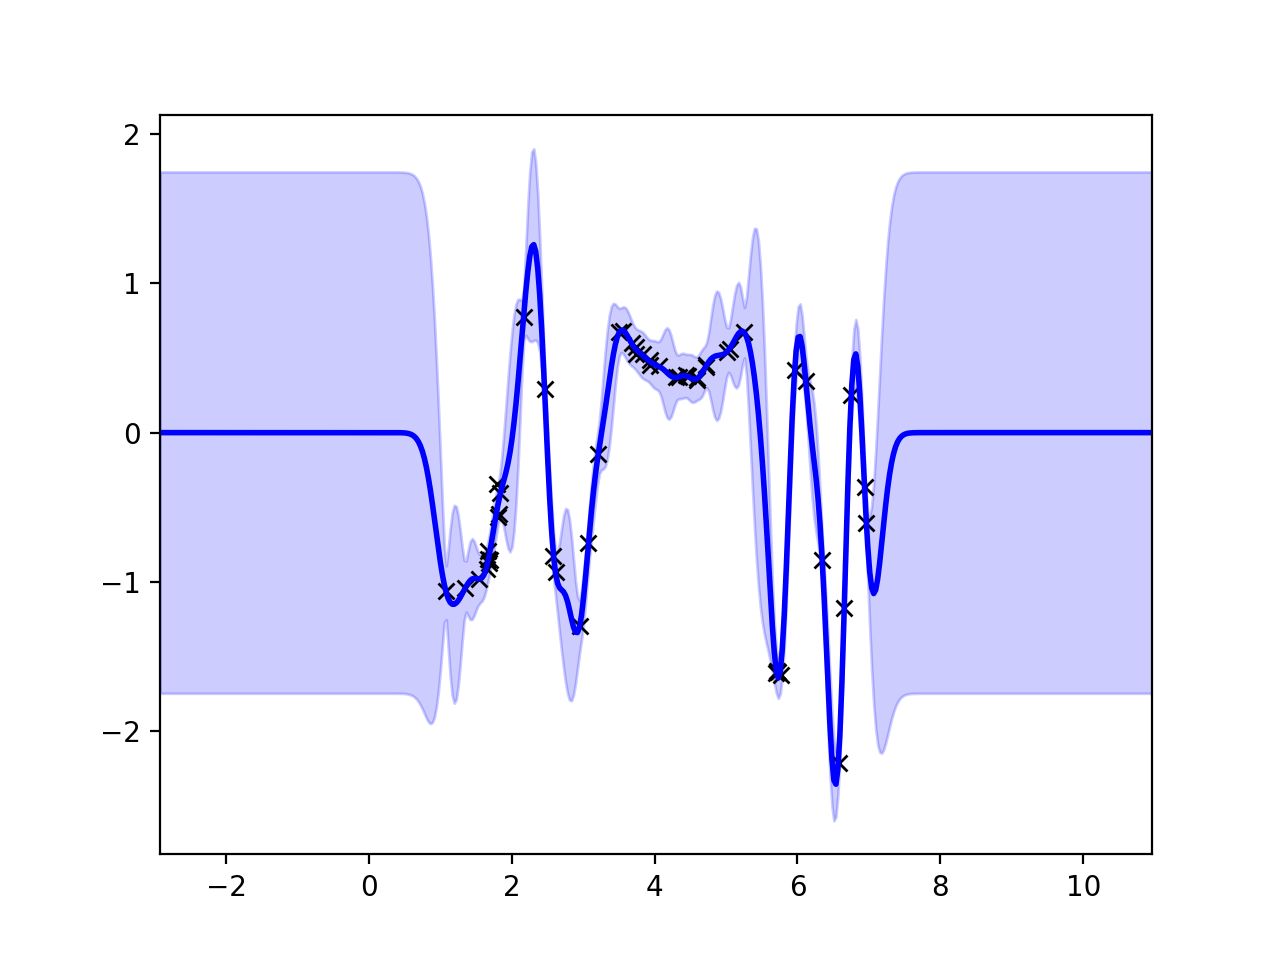

In [35]:
model_gp, df = full_GP_reg(X_train, y_train, X_test, y_test)
fig = GP_figures(model_gp).plot()

In [6]:
# fig.savefig('../fig.png')
# save_df('../', df, name='scores')

## Sparse GP

create SGP model and optimize ...
Test MSE =0.076, NLL =3.291


<IPython.core.display.Javascript object>


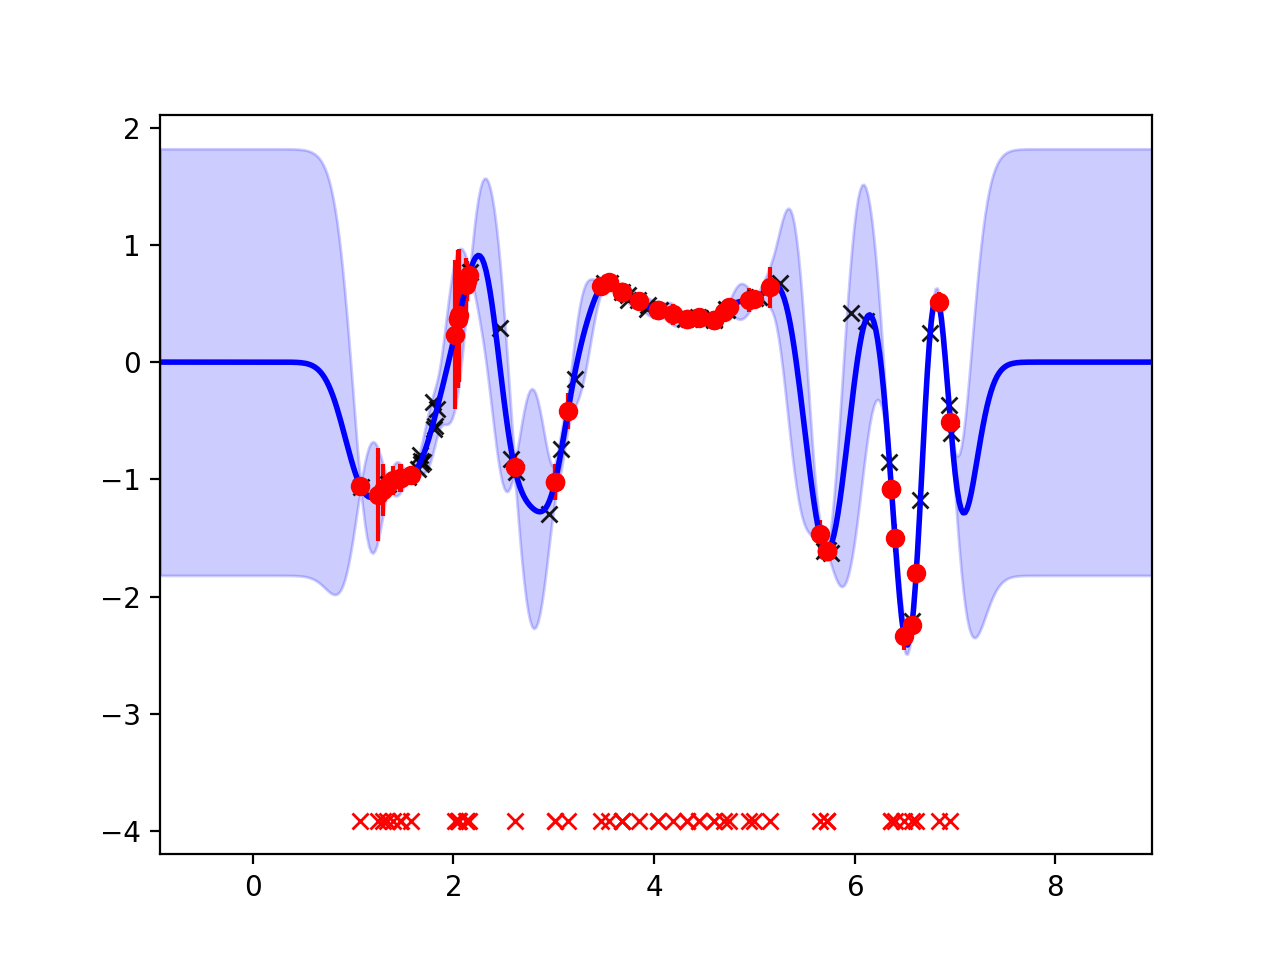

In [37]:
model_sgp, df = sparse_GP_reg(X_train, y_train, X_test, y_test, M=51)
fig = SGP_figures(model_sgp).plot()

# AEP Deep GPs

Create DGP model and optimize ...
Optimise with fixed:  []
Default initialisation
iter 0 	 obj 22.762
iter 50 	 obj 4.856
iter 100 	 obj 2.686
iter 150 	 obj 1.667
iter 200 	 obj 1.239
iter 250 	 obj 1.035
iter 300 	 obj 0.954
iter 350 	 obj 0.921
iter 400 	 obj 0.905
iter 450 	 obj 0.894
iter 500 	 obj 0.885
iter 550 	 obj 0.878
iter 600 	 obj 0.872
iter 650 	 obj 0.866
iter 700 	 obj 0.860
iter 750 	 obj 0.849
iter 800 	 obj 0.833
iter 850 	 obj 0.810
iter 900 	 obj 0.748
iter 950 	 obj 0.696
iter 1000 	 obj 0.668
iter 1050 	 obj 0.646
iter 1100 	 obj 0.627
iter 1150 	 obj 0.611
iter 1200 	 obj 0.597
iter 1250 	 obj 0.584
iter 1300 	 obj 0.574
iter 1350 	 obj 0.565
iter 1400 	 obj 0.557
iter 1450 	 obj 0.549
Test MSE= 0.067, NLL= -0.422, SN= 0.105


<IPython.core.display.Javascript object>


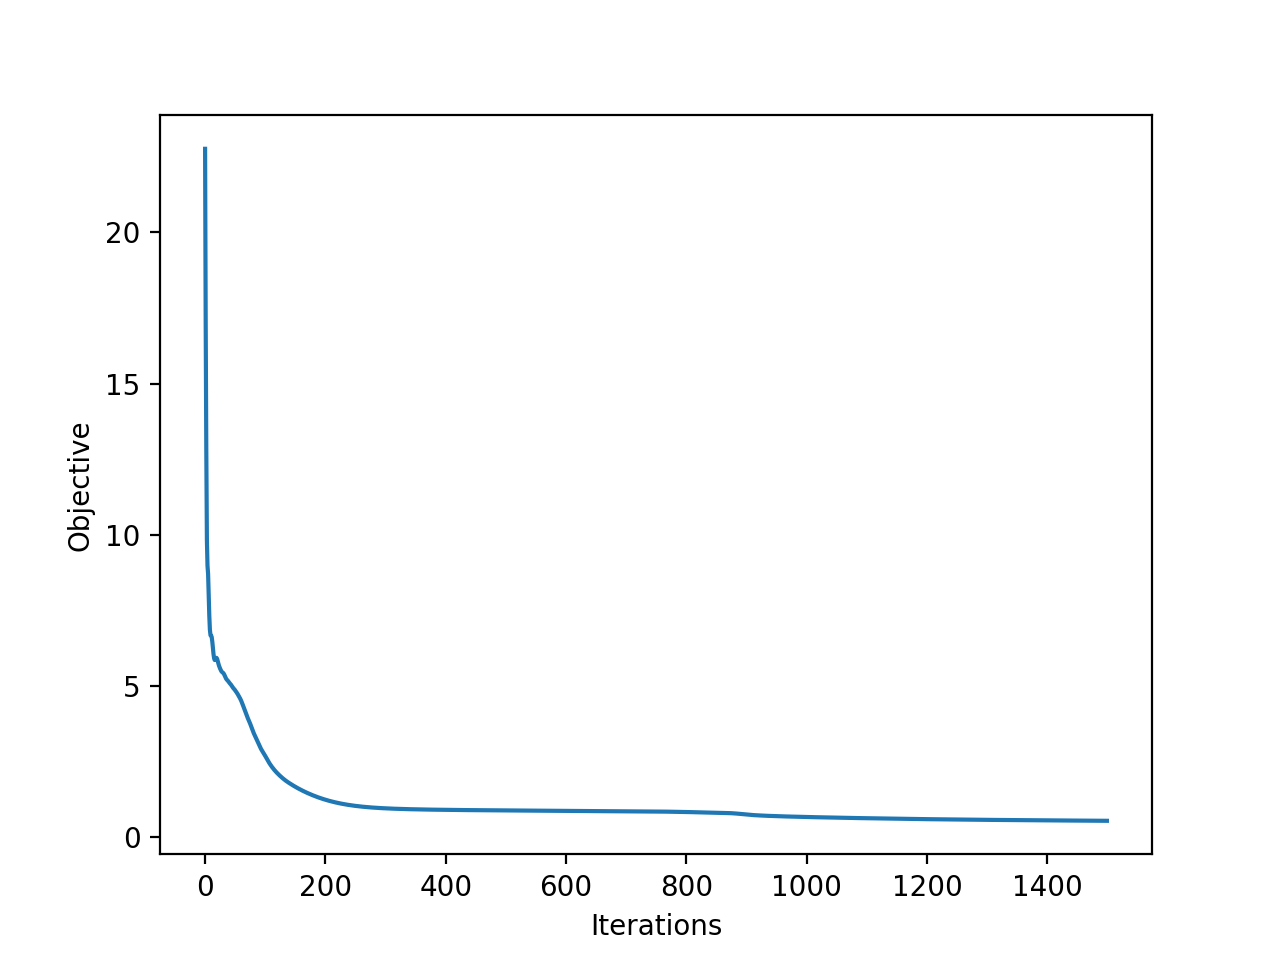

In [44]:
N_train = X_train.shape[0]
config_dict = {'M': 51, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1500,
                'MB': 250, 'lr': 0.01, 'fixed_hyp': [], 'init_type': True}
#             'MB': 250, 'lr': 0.01, 'fixed_hyp': ['zu_0', 'eta2_0'], 'init_type': 'greedy'}

model, df, costs = aep_DGP_reg(X_train, y_train, X_test, y_test, 
				conf_dict= config_dict,
				return_cost=True)
fig0 = DGP_figures(model,conf_dict=config_dict).plot_cost(costs)

In [42]:
config_dict['optimizer'] = 'adam'
config_dict = {'M': 51, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': [], 'init_type': 'greedy'}
model, df = cont_optimization(model, X_test, y_test, conf_dict=config_dict,
                              new_max_it=1000, return_cost=False)

Optimise with fixed:  []
iter 0 	 obj 1.007
iter 50 	 obj 0.945
iter 100 	 obj 0.912
iter 150 	 obj 0.889
iter 200 	 obj 0.869
iter 250 	 obj 0.851
iter 300 	 obj 0.834
iter 350 	 obj 0.818
iter 400 	 obj 0.802
iter 450 	 obj 0.786
iter 500 	 obj 0.773
iter 550 	 obj 0.762
iter 600 	 obj 0.751
iter 650 	 obj 0.741
iter 700 	 obj 0.732
iter 750 	 obj 0.722
iter 800 	 obj 0.711
iter 850 	 obj 0.704
iter 900 	 obj 0.696
iter 950 	 obj 0.689
Test MSE= 0.038, NLL= -0.582, SN= 0.075


In [19]:
print dir(DGP_figures)
# Test MSE= 0.023, NLL= -0.525, SN= 0.085


['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'h_out', 'h_out2', 'in_h', 'in_out', 'plot', 'plot_cost', 'plot_h_out', 'plot_hidden', 'plot_in_h', 'plot_init', 'plot_sample']


### Fitting plots

<IPython.core.display.Javascript object>


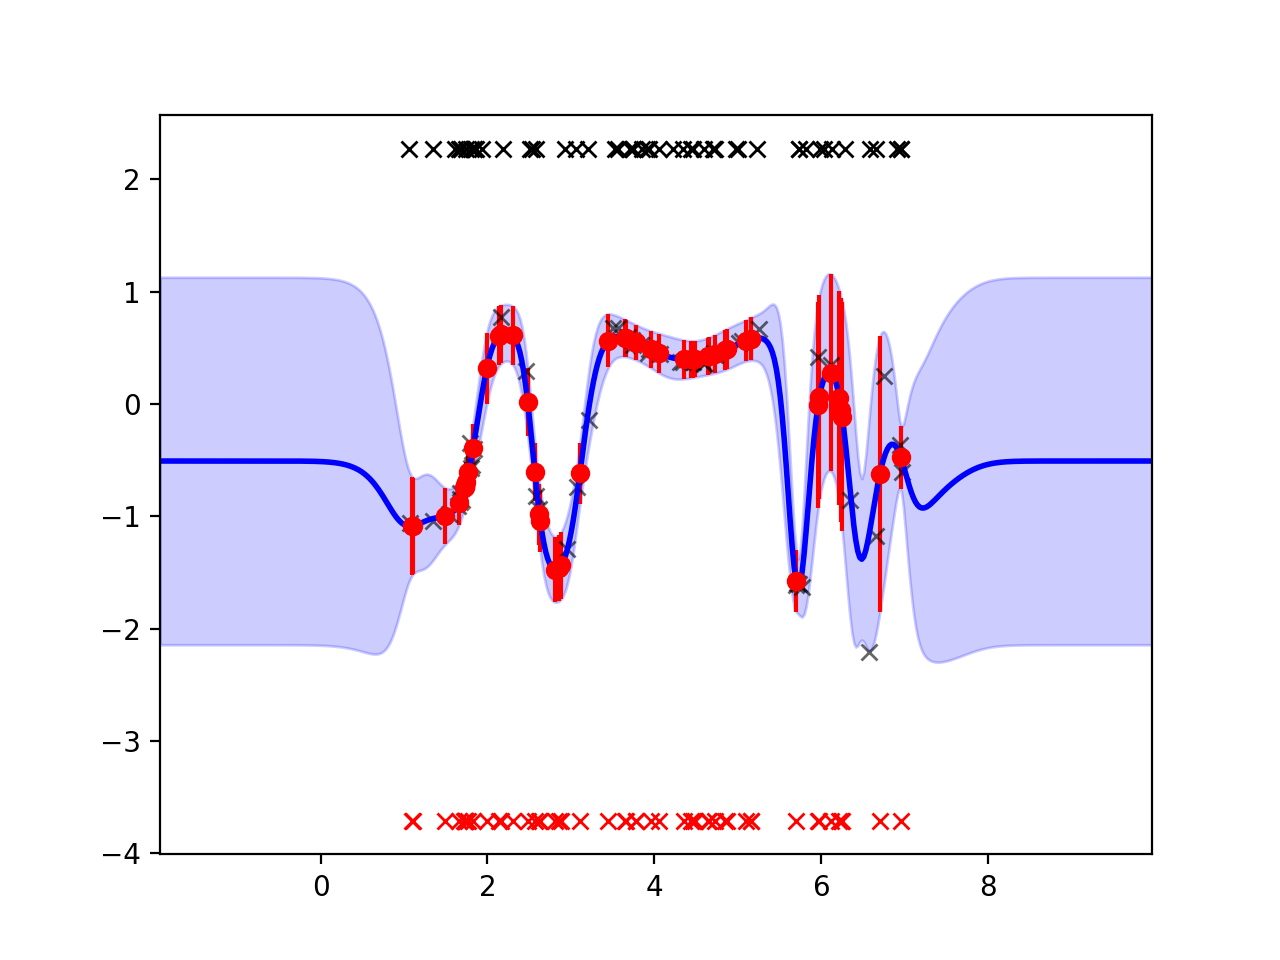

Default initialisation


<IPython.core.display.Javascript object>


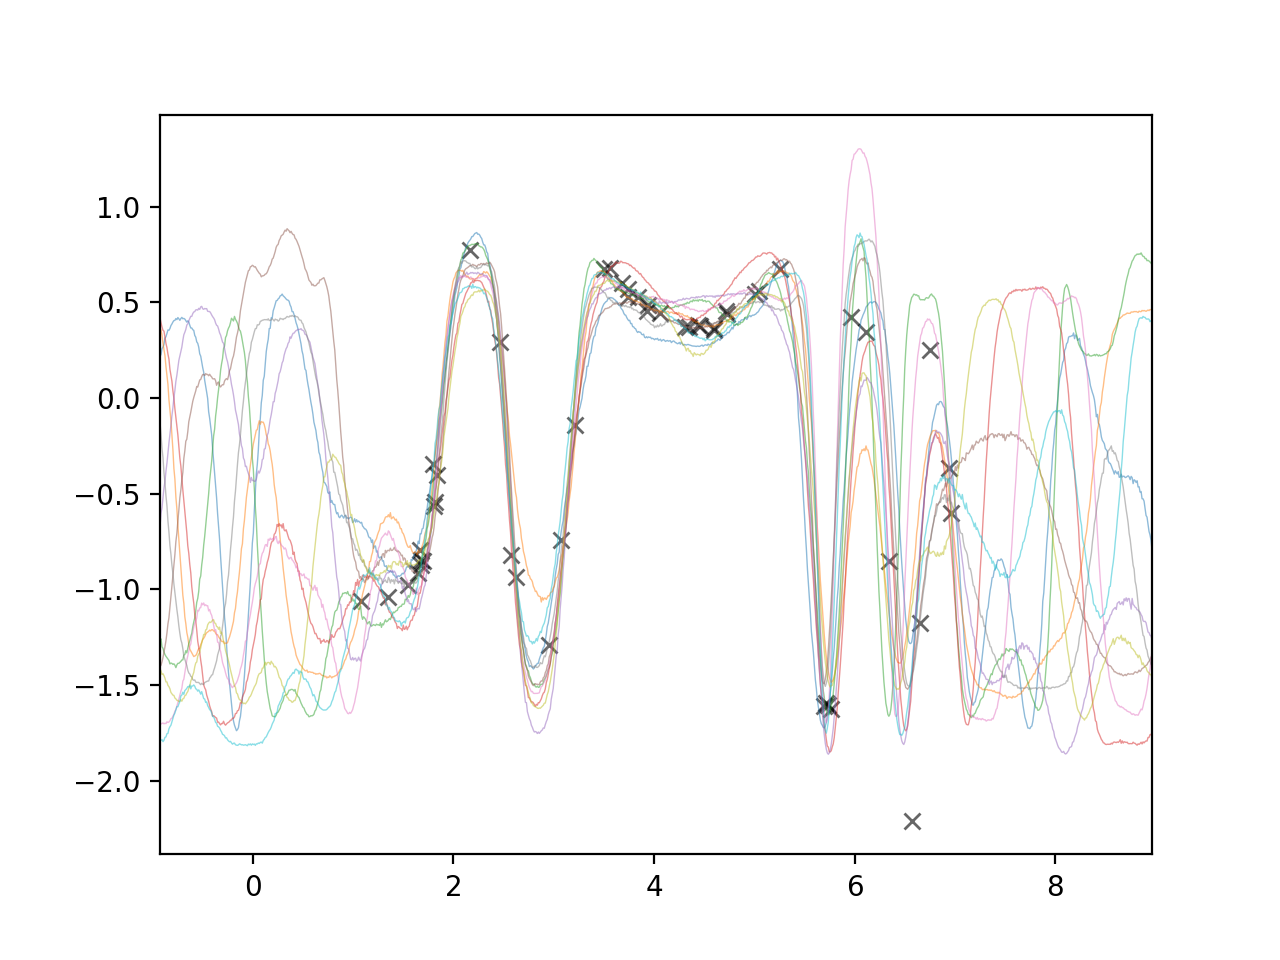

In [46]:
fig1 = DGP_figures(model, config_dict).plot()
fig2 = DGP_figures(model, config_dict).plot_sample()

### Hidden Layer

Default initialisation


<IPython.core.display.Javascript object>


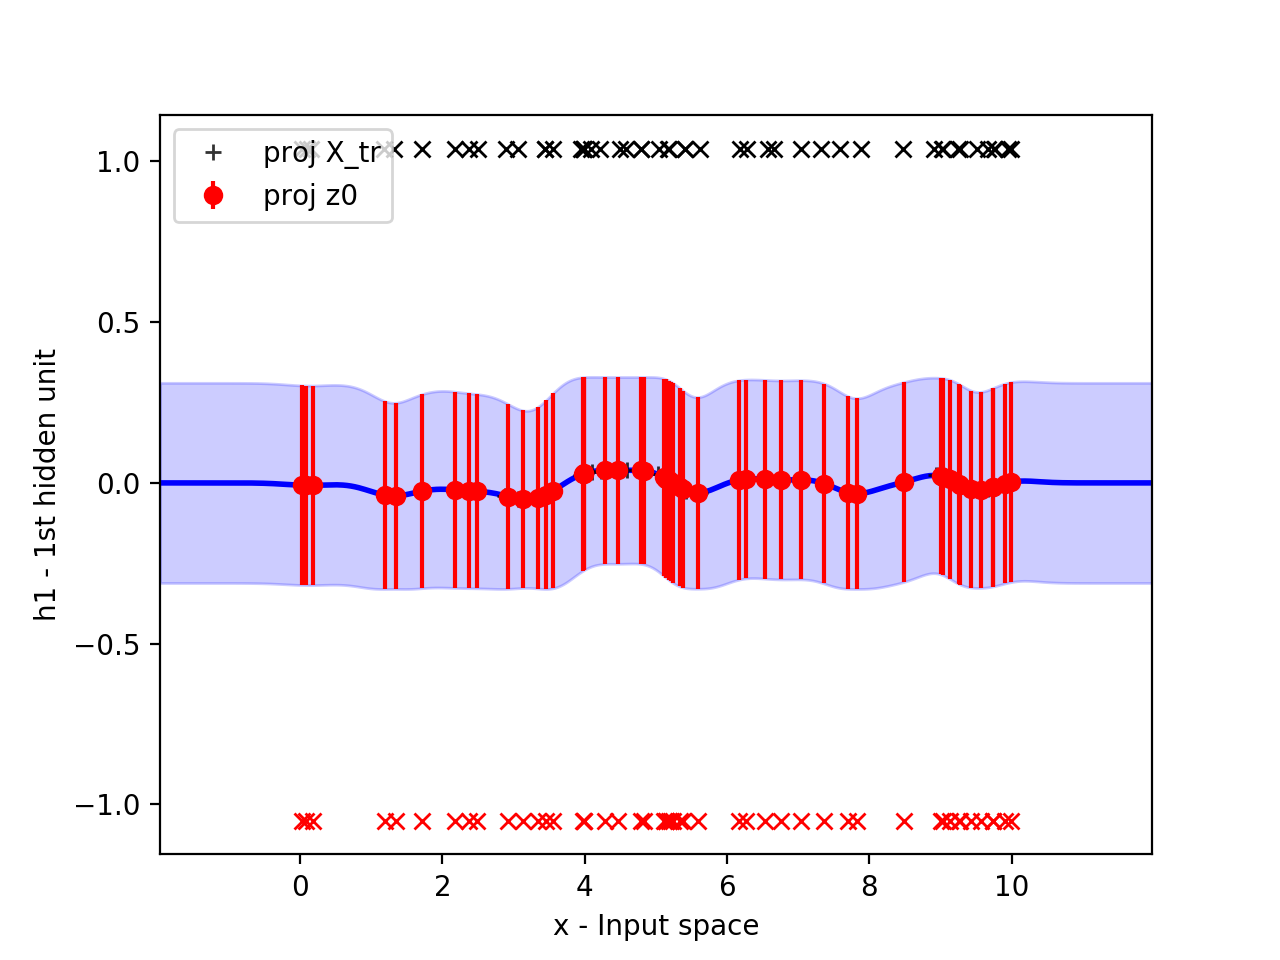

<IPython.core.display.Javascript object>


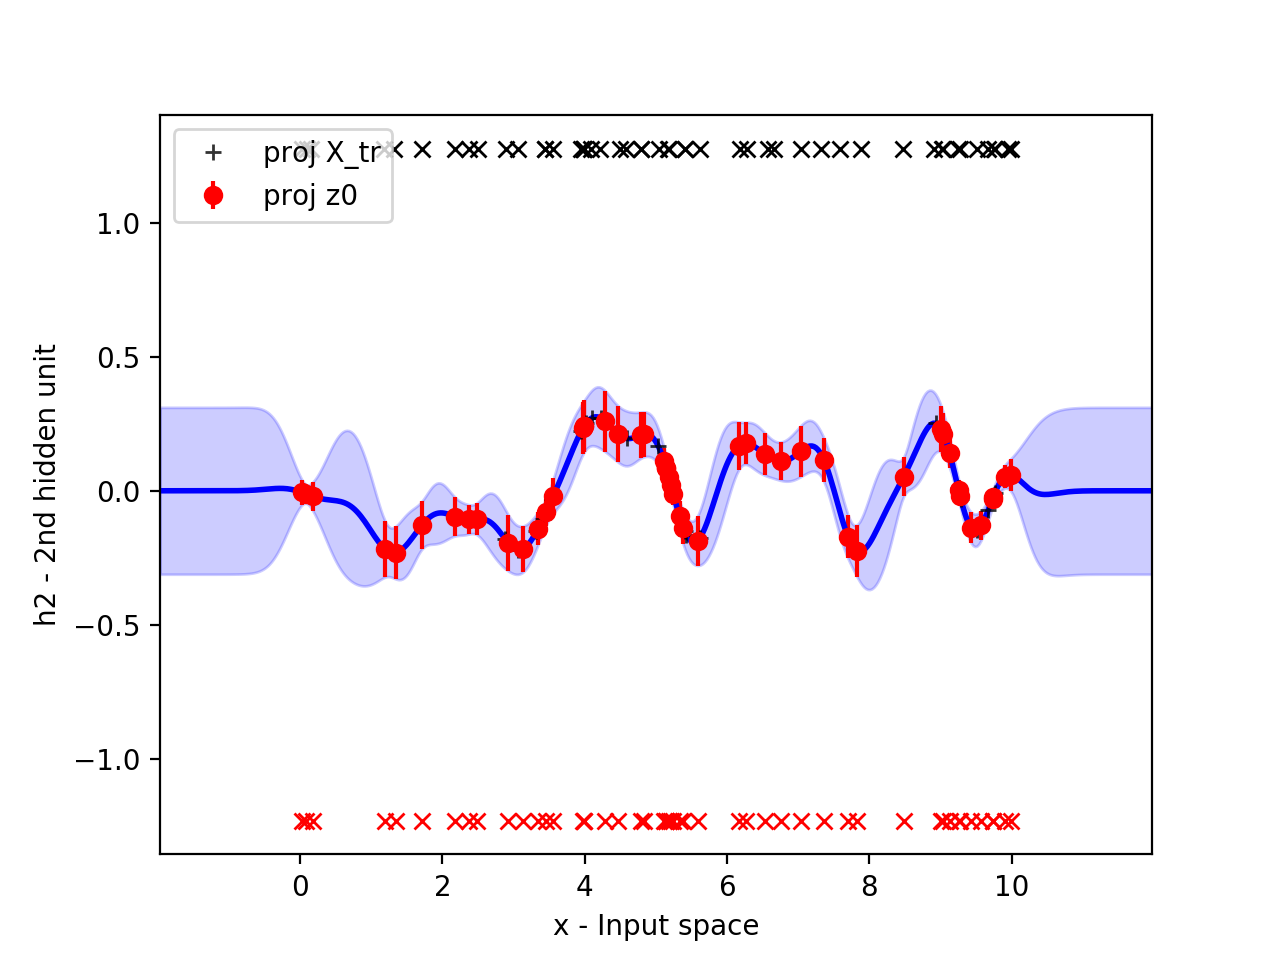

In [10]:
fig3 = DGP_figures(model, conf_dict=config_dict).plot_in_h()

Default initialisation


<IPython.core.display.Javascript object>


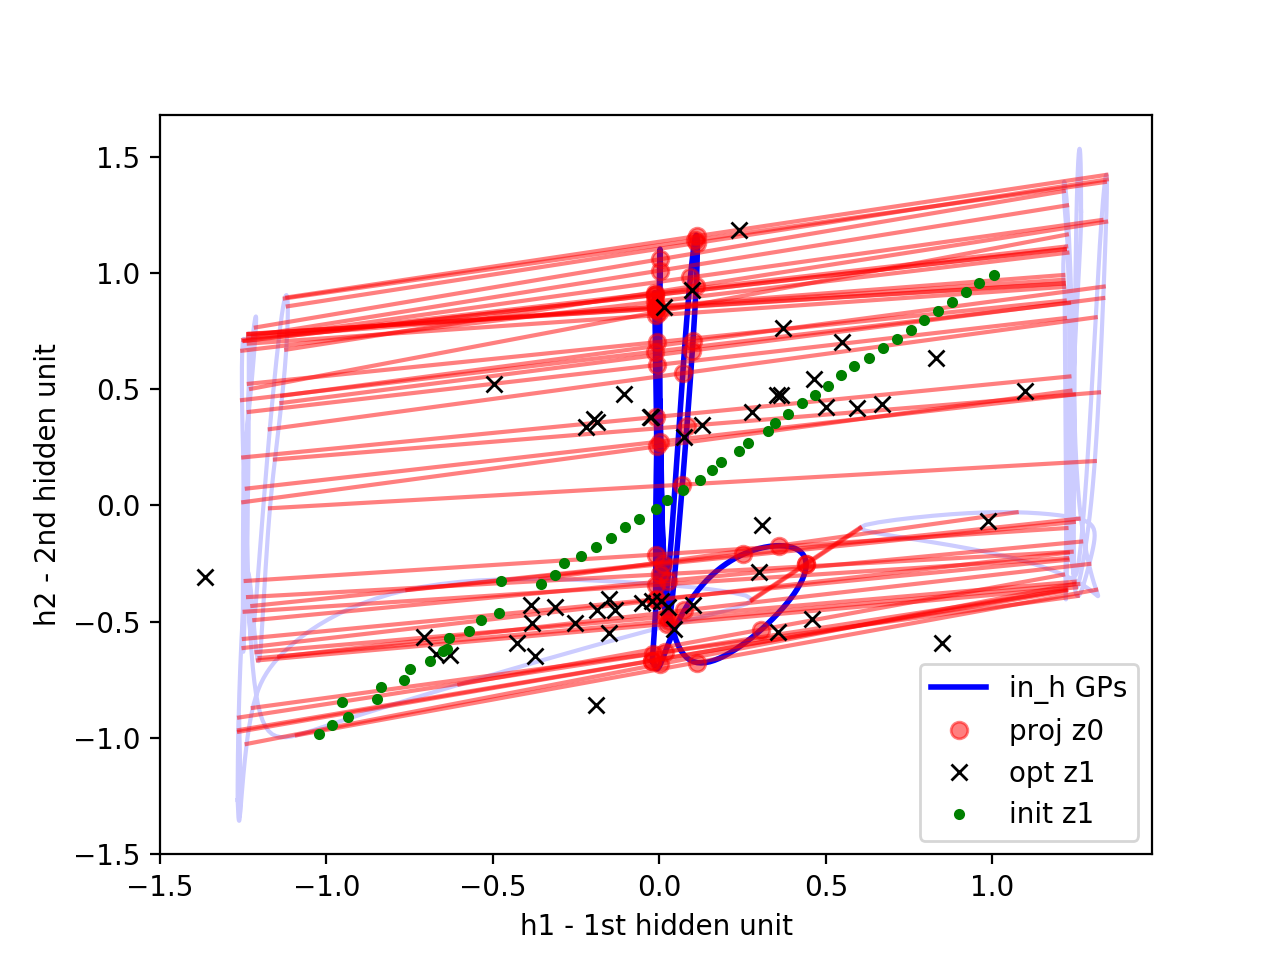

In [27]:
fig4 = DGP_figures(model, conf_dict=config_dict).plot_hidden()

Default initialisation


<IPython.core.display.Javascript object>


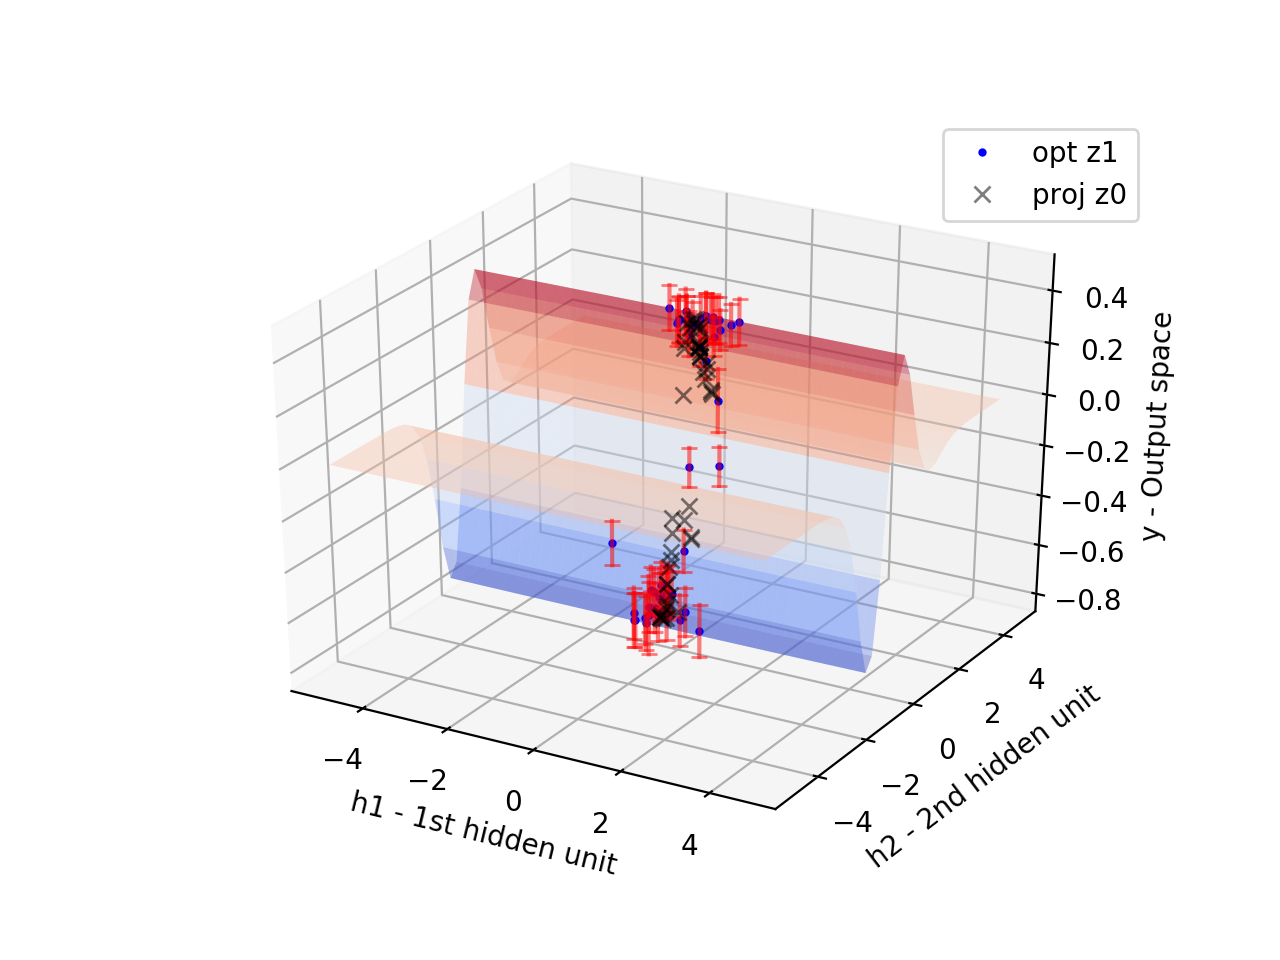

In [28]:
fig5 = DGP_figures(model, conf_dict=config_dict).plot_h_out()

### Initialisations

SGP greedy initialisation
Perform sparse GP regression
theta1 not positive definite
theta1 not positive definite
sf_0
sn
ls_0
eta2_0
zu_0
eta1_R_0


<IPython.core.display.Javascript object>


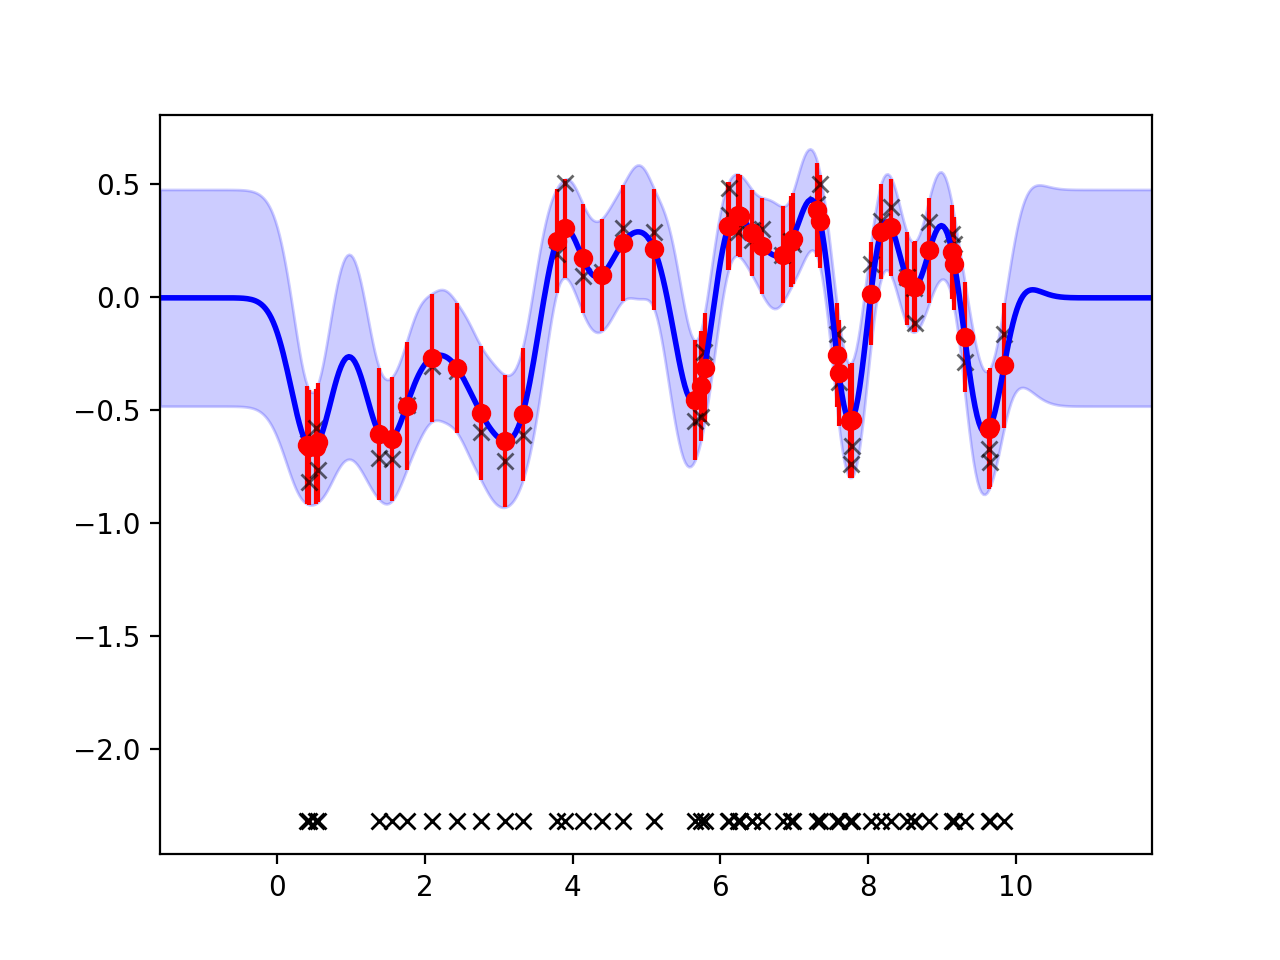

In [14]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()

In [2]:
model

NameError: name 'model' is not defined